In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

### Leituras

In [2]:
df_properati = pd.read_csv('./DHDSPaDM1A7/Data/Real_State_Properati.csv', sep='\t')

In [3]:
df_properati

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0


### Analise preliminar dos dados

In [5]:
df_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [6]:
df_properati.isnull().sum()

property_type          0
place_name             0
country_name           0
state_name             0
lat                    0
lon                    0
price                  0
currency               0
surface_total_in_m2    0
dtype: int64

In [7]:
print(df_properati.currency.unique())
print(df_properati.country_name.unique())
print(df_properati.state_name.unique())
print(df_properati.property_type.unique())
print(df_properati.place_name.unique())

['USD' 'ARS']
['Argentina']
['Capital Federal']
['PH' 'apartment' 'house' 'store']
['Mataderos' 'Belgrano' 'Palermo' 'Flores' 'Boedo' 'Las Cañitas'
 'Puerto Madero' 'Balvanera' 'Caballito' 'Nuñez' 'Floresta' 'Barracas'
 'Recoleta' 'Congreso' 'Villa Crespo' 'Chacarita' 'Almagro' 'Constitución'
 'Colegiales' 'Villa Urquiza' 'Barrio Norte' 'Palermo Hollywood'
 'Saavedra' 'Paternal' 'Agronomía' 'Villa Pueyrredón' 'Coghlan'
 'Parque Centenario' 'San Telmo' 'Monserrat' 'Boca' 'Parque Avellaneda'
 'San Cristobal' 'Abasto' 'Versalles' 'Villa del Parque' 'Monte Castro'
 'Retiro' 'Capital Federal' 'Parque Chas' 'Palermo Chico' 'Villa Devoto'
 'Palermo Soho' 'Centro / Microcentro' 'Liniers' 'Tribunales' 'Once'
 'San Nicolás' 'Parque Chacabuco' 'Velez Sarsfield' 'Catalinas' 'Pompeya'
 'Parque Patricios' 'Palermo Viejo' 'Villa Lugano' 'Villa Luro'
 'Villa General Mitre' 'Villa Ortuzar' 'Villa Santa Rita' 'Villa Soldati'
 'Villa Real' 'Villa Riachuelo']


In [8]:
###
#  Apos verificarmos quais colunas possuem o mesmo valor nas linhas, 
#       as eliminamos criando uma copia do DF original.
###

In [9]:
df_properati_std = df_properati[['property_type',
                                'place_name',
                                'lat',
                                'lon',
                                'price',
                                'currency',
                                'surface_total_in_m2']].copy()
df_properati_std

,property_type,place_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,-34.652356,-58.501624,239000.0,USD,140.0
...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,-34.599214,-58.402519,165000.0,USD,91.0
17219,apartment,Recoleta,-34.587425,-58.397372,165000.0,USD,44.0
17220,apartment,Belgrano,-34.563685,-58.442683,410000.0,USD,157.0
17221,apartment,Belgrano,-34.563685,-58.442683,410000.0,USD,157.0


In [ ]:
###
#             Para padronizar as contas e eliminar a coluna 'currency' vamos 
#                       passar todos os preços para 'USD'.
###

In [11]:
dolar={'USD':1, 'ARS': 0.0085}
df_properati_std['preco_dolar'] = df_properati_std.currency.map(dolar)*df_properati_std.price

df_properati_std['price'] = df_properati_std['preco_dolar']

df_properati_std.drop(columns=['currency', 'preco_dolar'], inplace = True)

In [12]:
###
#             Criando colunas novas para analise.
###

In [13]:
# Coluna do preço por metro quadrado.

df_properati_std['price_m2'] = df_properati_std['price'] / df_properati_std['surface_total_in_m2']

### FATIAMENTO DE DADOS

In [ ]:
###
#VAMOS CRIAR NOVOS CONJUNTOS DE DADOS EM NOVAS COLUNAS AGRUPANDO PARAMETROS COMUNS
###

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price_m2'>

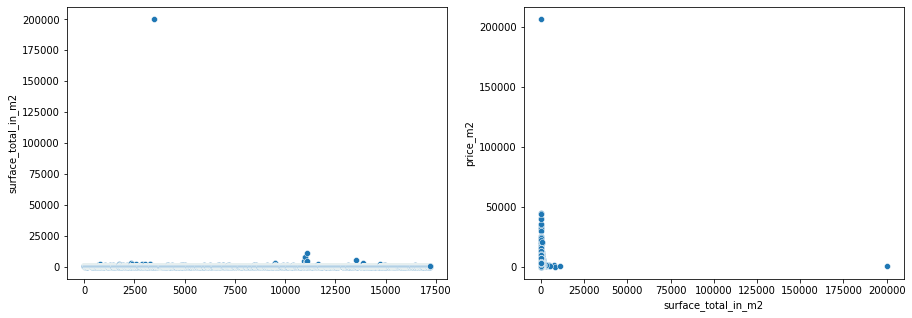

In [15]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,5))

sns.scatterplot(ax=axes[0], data = df_properati_std['surface_total_in_m2'])

sns.scatterplot(ax=axes[1], data = df_properati_std,
                x = 'surface_total_in_m2',
                y = 'price_m2')

In [16]:
lista_drop = []

lista_drop.append(list(df_properati_std[df_properati_std['price_m2'] > 100000].index)) 

lista_drop.append(list(df_properati_std[df_properati_std['surface_total_in_m2'] > 25000].index)) 

lista_drop.append(list(df_properati_std[df_properati_std['price'] > 20000000].index)) 

lista_drop = set(sum(lista_drop, []))
lista_drop = list(lista_drop) 

df_properati_std.drop(lista_drop, inplace=True)
df_properati_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17215 entries, 0 to 17222
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17215 non-null  object 
 1   place_name           17215 non-null  object 
 2   lat                  17215 non-null  float64
 3   lon                  17215 non-null  float64
 4   price                17215 non-null  float64
 5   surface_total_in_m2  17215 non-null  float64
 6   price_m2             17215 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [17]:
#Então definimos as faixas de luxo do m2 dos imóveis com a lista abaixo.

bins_lux = [0, 2500, 5000, 7500, 10000, 15000, 30000, 50000] 

luxury_m2_type = pd.cut(df_properati_std.price_m2, bins= bins_lux, right = False)
group_labels = ['super_popular', 'popular', 'normal', 'good', 'great', 'luxury', 'extreme_luxury']
luxury_m2_type_categorizado = pd.cut(df_properati_std.price_m2, bins = bins_lux, labels = group_labels)

df_properati_std['luxury_m2_type'] = luxury_m2_type_categorizado


#Então definimos as faixas de tamanho do m2 dos imóveis com a lista abaixo.

bins_m2 = [0, 20, 80, 200, 400, 600, 1000, 2000, 20000] 

surface_m2_type = pd.cut(df_properati_std.surface_total_in_m2, bins= bins_m2, right = False)

group_labels = ['XP', 'P','M', 'G', 'GG', 'XG', 'XXG', 'XXXG']
surface_m2_type_categorizado = pd.cut(df_properati_std.surface_total_in_m2, bins = bins_m2, labels = group_labels)

df_properati_std['surface_m2_type'] = surface_m2_type_categorizado

df_properati_std

,property_type,place_name,lat,lon,price,surface_total_in_m2,price_m2,luxury_m2_type,surface_m2_type
0,PH,Mataderos,-34.661824,-58.508839,62000.0,55.0,1127.272727,super_popular,P
1,apartment,Mataderos,-34.652262,-58.522982,72000.0,55.0,1309.090909,super_popular,P
2,apartment,Belgrano,-34.559873,-58.443362,138000.0,45.0,3066.666667,popular,P
3,apartment,Belgrano,-34.559873,-58.443362,195000.0,65.0,3000.000000,popular,P
4,PH,Mataderos,-34.652356,-58.501624,239000.0,140.0,1707.142857,super_popular,M
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,-34.599214,-58.402519,165000.0,91.0,1813.186813,super_popular,M
17219,apartment,Recoleta,-34.587425,-58.397372,165000.0,44.0,3750.000000,popular,P
17220,apartment,Belgrano,-34.563685,-58.442683,410000.0,157.0,2611.464968,popular,M
17221,apartment,Belgrano,-34.563685,-58.442683,410000.0,157.0,2611.464968,popular,M


### Segunda análise

<AxesSubplot:xlabel='place_name', ylabel='price_m2'>

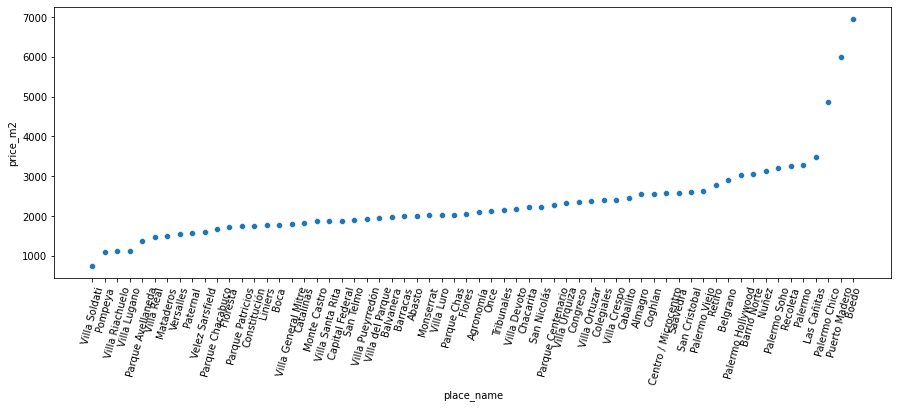

In [18]:
group_place_m2 = df_properati_std.groupby(['place_name']).price_m2.mean().sort_values()
ax = sns.scatterplot(data = group_place_m2) 
ax.figure.set_size_inches(15, 5)
plt.xticks(rotation=75)
ax

<AxesSubplot:xlabel='property_type', ylabel='price_m2'>

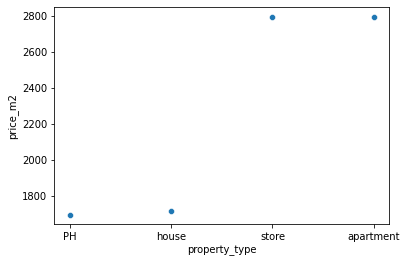

In [19]:
group_property_type_m2 = df_properati_std.groupby(['property_type']).price_m2.mean().sort_values()
ax = sns.scatterplot(data = group_property_type_m2) 
plt.xticks(rotation=0)
ax

<AxesSubplot:xlabel='surface_m2_type', ylabel='price_m2'>

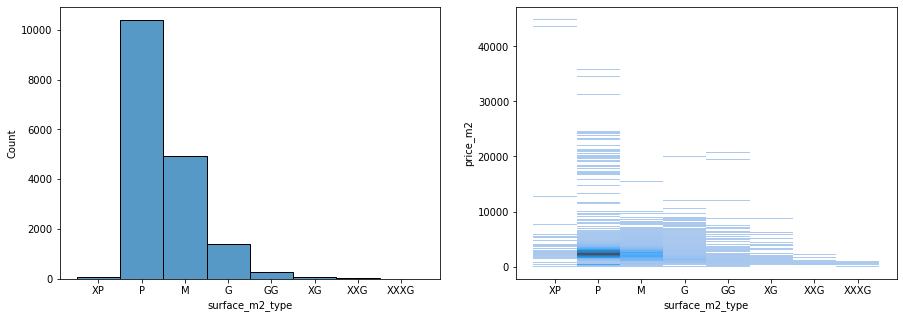

In [20]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,5))

sns.histplot(ax=axes[0], data = df_properati_std.surface_m2_type)

sns.histplot(ax=axes[1], data = df_properati_std,  
             x = 'surface_m2_type',
             y = 'price_m2')

<AxesSubplot:title={'center':'Propiedade'}, xlabel='Tipo de Propriedade', ylabel='Preço do m2'>

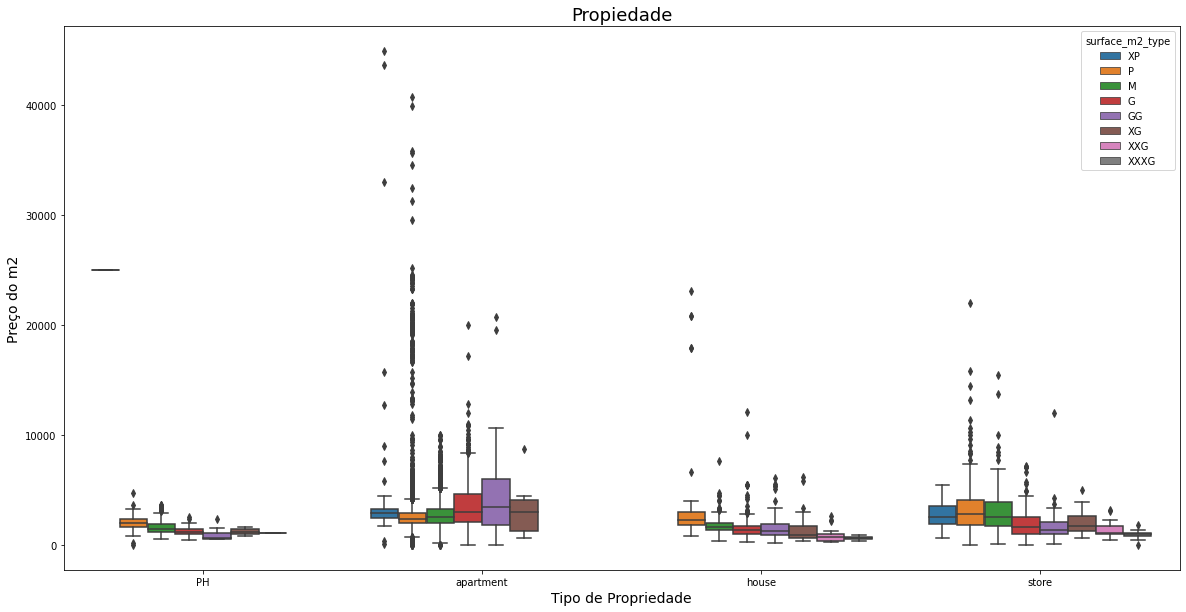

In [21]:
ax = sns.boxplot(x='property_type', y='price_m2', data=df_properati_std, hue='surface_m2_type')
ax.figure.set_size_inches(20, 10)
ax.set_title('Propiedade', fontsize=18)
ax.set_xlabel('Tipo de Propriedade', fontsize=14)
ax.set_ylabel('Preço do m2', fontsize=14)
plt.xticks(rotation=0)
ax

In [22]:
pd.crosstab(df_properati_std.surface_m2_type, df_properati_std.luxury_m2_type)

luxury_m2_type,super_popular,popular,normal,good,great,luxury,extreme_luxury
surface_m2_type,,,,,,,
XP,30,52,3,2,1,2,3
P,5953,4133,147,18,21,116,7
M,2730,1867,293,30,1,1,0
G,859,382,119,29,8,2,0
GG,199,34,23,3,6,2,0
XG,61,18,3,1,0,0,0
XXG,38,3,0,0,0,0,0
XXXG,15,0,0,0,0,0,0


<AxesSubplot:>

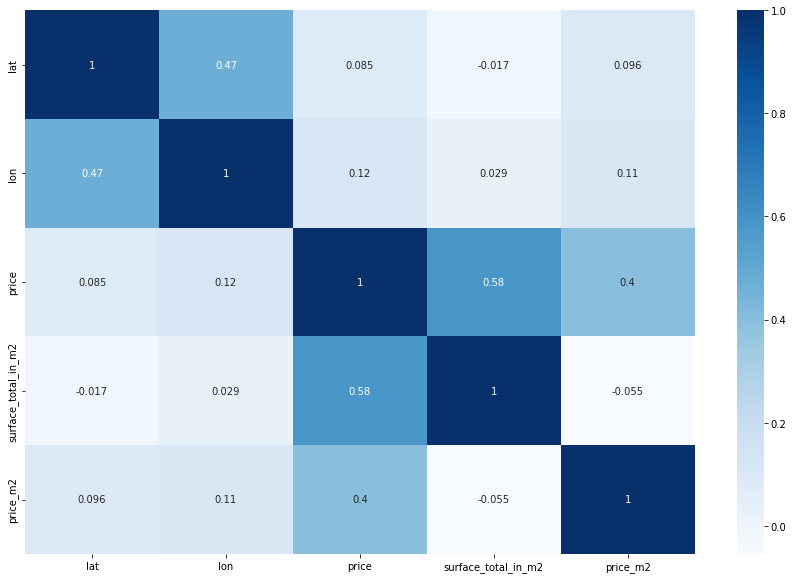

In [23]:
#heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_properati_std.corr(), annot = True, cmap ='Blues')

### Tratamento dos outliers

In [24]:
#função para definir os limites dos outliers
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

In [25]:
#limite inferior e superior do preço por metro quadrado
print(limites(df_properati_std.price_m2))

(241.66666666666674, 4575.0)


In [26]:
#criando uma função para plotar o mesmo gráfico, mas mudando o eixo
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

#criando uma função para o histograma
def histograma(coluna):
    plt.figure(figsize = (15,5))
    sns.distplot(coluna, hist = True)

#criando a função de excluir outliers
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [27]:
df_properati_std.shape[0]

17215

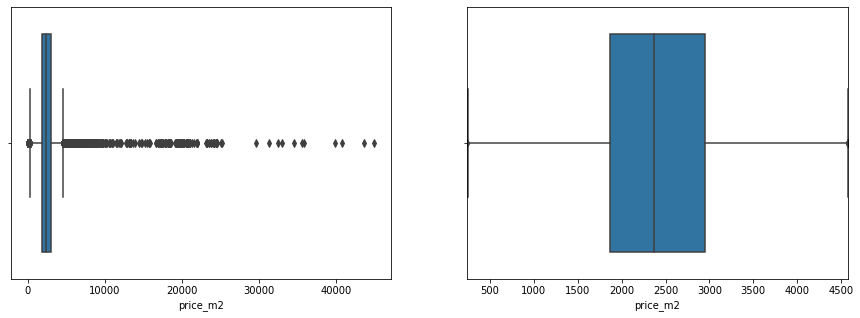

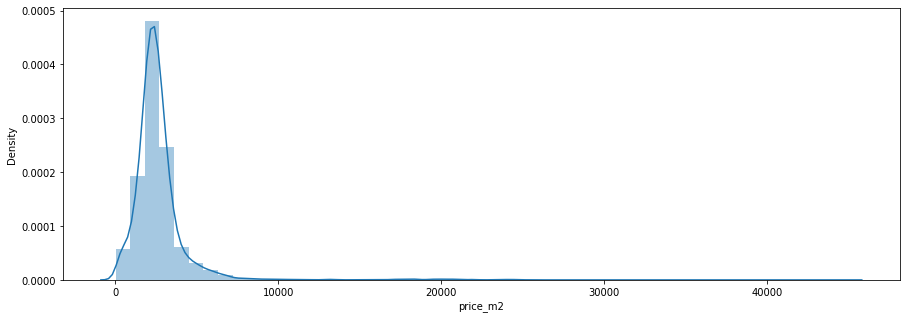

In [28]:
#plotando o bloxplot com preço em metro quadrado por tipo de propriedade
diagrama_caixa(df_properati_std['price_m2'])
#plotando o histograma
histograma(df_properati_std['price_m2'])

In [29]:
#criando um novo DF sem os outliers

df_properati_std_sout, linhas_removidas = excluir_outliers(df_properati_std, 'price_m2')
print('{} linhas removidas'.format(linhas_removidas))

1182 linhas removidas


In [30]:
df_properati_std_sout.shape[0]

16033

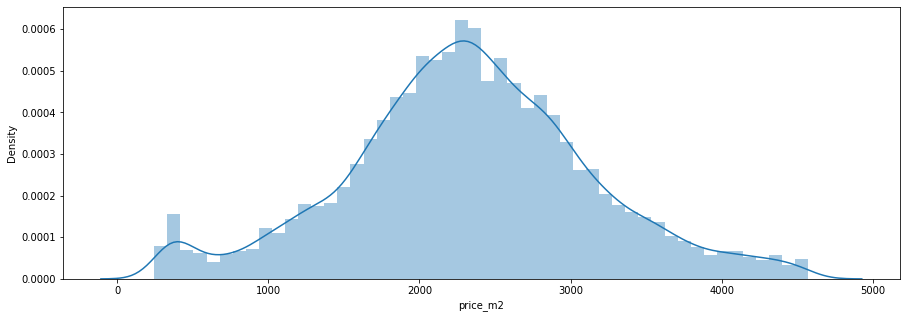

In [31]:
#histograma sem outliers
histograma(df_properati_std_sout['price_m2'])

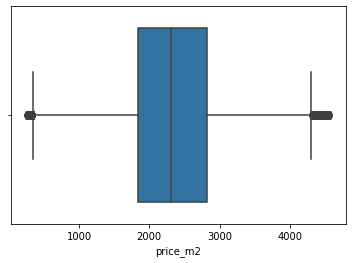

In [32]:
#boxplot sem outliers
ax = sns.boxplot(x='price_m2', data=df_properati_std_sout, orient = 'h')


In [33]:
#correlação entre as colunas
print(df_properati_std_sout.corr())

                          lat       lon     price  surface_total_in_m2  \
lat                  1.000000  0.497940  0.087240            -0.022208   
lon                  0.497940  1.000000  0.064945             0.019912   
price                0.087240  0.064945  1.000000             0.790691   
surface_total_in_m2 -0.022208  0.019912  0.790691             1.000000   
price_m2             0.280127  0.087079  0.192020            -0.163557   

                     price_m2  
lat                  0.280127  
lon                  0.087079  
price                0.192020  
surface_total_in_m2 -0.163557  
price_m2             1.000000  


<AxesSubplot:>

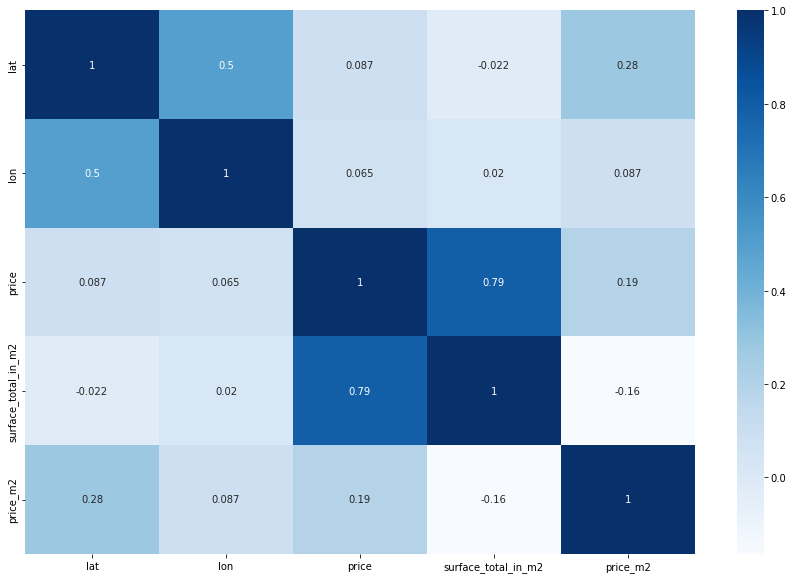

In [34]:
#heatmap pós limpeza dos outliers
plt.figure(figsize=(15,10))
sns.heatmap(df_properati_std_sout.corr(), annot = True, cmap ='Blues')

### Resultados pós remoção dos outliers

In [35]:
#crosstab pós limpeza dos outliers
pd.crosstab(df_properati_std_sout.surface_m2_type, df_properati_std_sout.luxury_m2_type)

luxury_m2_type,super_popular,popular
surface_m2_type,,
XP,29,50
P,5899,4037
M,2717,1748
G,849,342
GG,196,32
XG,61,18
XXG,38,3
XXXG,14,0


<AxesSubplot:xlabel='property_type', ylabel='price_m2'>

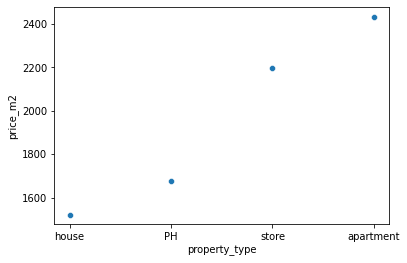

In [36]:
group_property_type_m2 = df_properati_std_sout.groupby(['property_type']).price_m2.mean().sort_values()
ax = sns.scatterplot(data = group_property_type_m2) 
plt.xticks(rotation=0)
ax

<AxesSubplot:xlabel='place_name', ylabel='price_m2'>

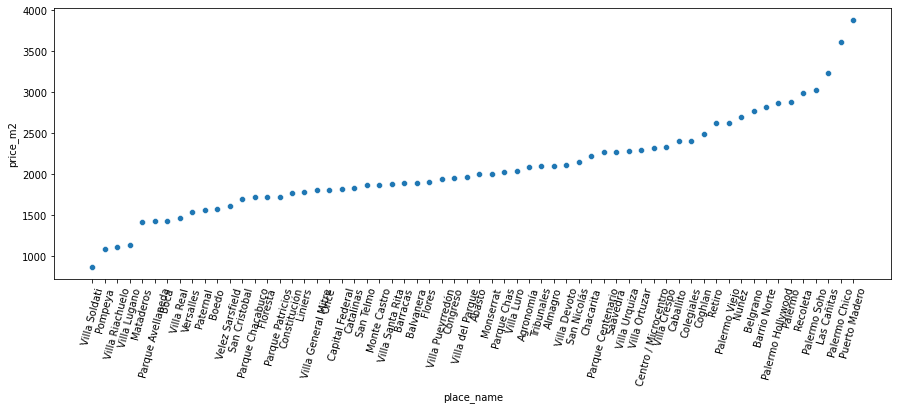

In [37]:
group_place_m2 = df_properati_std_sout.groupby(['place_name']).price_m2.mean().sort_values()
ax = sns.scatterplot(data = group_place_m2) 
ax.figure.set_size_inches(15, 5)
plt.xticks(rotation=75)
ax

<AxesSubplot:xlabel='surface_m2_type', ylabel='price_m2'>

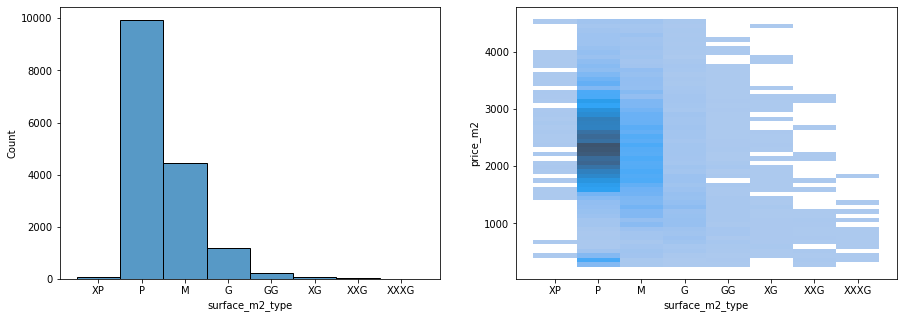

In [38]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,5))

sns.histplot(ax=axes[0], data = df_properati_std_sout.surface_m2_type)

sns.histplot(ax=axes[1], data = df_properati_std_sout,  
             x = 'surface_m2_type',
             y = 'price_m2')

<AxesSubplot:title={'center':'Propiedade'}, xlabel='Tipo de Propriedade', ylabel='Preço do m2'>

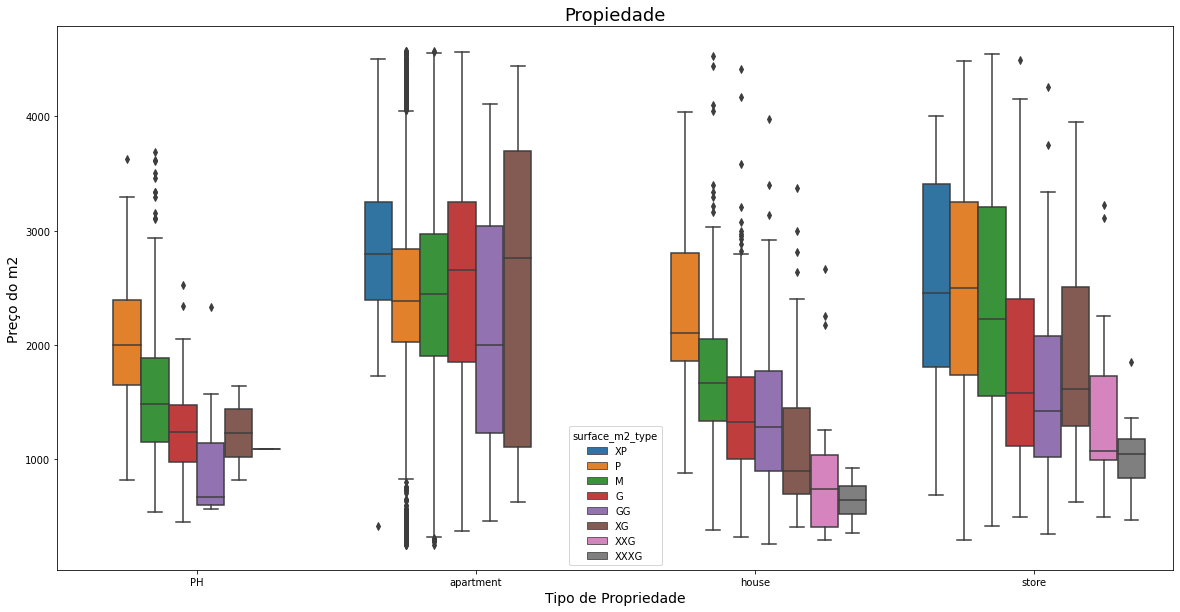

In [39]:
ax = sns.boxplot(x='property_type', y='price_m2', data=df_properati_std_sout, hue='surface_m2_type')
ax.figure.set_size_inches(20, 10)
ax.set_title('Propiedade', fontsize=18)
ax.set_xlabel('Tipo de Propriedade', fontsize=14)
ax.set_ylabel('Preço do m2', fontsize=14)
plt.xticks(rotation=0)
ax

In [40]:
len(df_properati_std_sout.place_name.unique())

62

### Parte 2 TP

In [58]:
""" 
Data Frames que serão analizados 

df_properati_std = dataframe com OUTLIERS

df_properati_std_sout = dataframe sem OUTLIERS

"""

' \n\nData Frames que serão analizados \n\ndf_properati_std = dataframe com OUTLIERS\n\ndf_properati_std_sout = dataframe sem OUTLIERS\n\n'

### Modelo 1

In [79]:
### Treinamento para ML

# Criamos X e y
feature_cols = ['price', 'surface_total_in_m2']
X = df_properati_std_sout[feature_cols]
y = df_properati_std_sout.price_m2

# Checamos a forma e o tipo de cada um
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (16033, 2)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (16033,)
Type y: <class 'pandas.core.series.Series'>


In [80]:
#from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

In [81]:
#from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model

model.fit(Xtrain, ytrain)

LinearRegression()

In [82]:
print(model.coef_, model.intercept_)

[ 2.65899931e-03 -3.55950600e+00] 2110.2432237962466


In [83]:
# Usando o método do objeto
test_sklearn = np.array(Xtest)
model.predict(test_sklearn)

array([2430.42819396, 2184.14243473, 2211.67545532, ..., 2266.27376816,
       2303.13458157, 2093.90654109])

In [84]:
ypred = model.predict(Xtest)
ypred

array([2430.42819396, 2184.14243473, 2211.67545532, ..., 2266.27376816,
       2303.13458157, 2093.90654109])

In [85]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 520.07
MSE: 455394.23
RMSE: 674.83
R2: 0.32


In [48]:
#from sklearn.metrics import accuracy_score
#accuracy_score(ytest, ypred)

### Modelo 2 

In [49]:
## Fazendo a Regressão linear Simples com os outliears

df = pd.get_dummies(df_properati_std, drop_first = True)

In [77]:
df

,lat,lon,price,surface_total_in_m2,price_m2,property_type_apartment,property_type_house,property_type_store,place_name_Agronomía,place_name_Almagro,...,luxury_m2_type_great,luxury_m2_type_luxury,luxury_m2_type_extreme_luxury,surface_m2_type_P,surface_m2_type_M,surface_m2_type_G,surface_m2_type_GG,surface_m2_type_XG,surface_m2_type_XXG,surface_m2_type_XXXG
0,-34.661824,-58.508839,62000.0,55.0,1127.272727,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-34.652262,-58.522982,72000.0,55.0,1309.090909,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-34.559873,-58.443362,138000.0,45.0,3066.666667,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-34.559873,-58.443362,195000.0,65.0,3000.000000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-34.652356,-58.501624,239000.0,140.0,1707.142857,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,-34.599214,-58.402519,165000.0,91.0,1813.186813,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17219,-34.587425,-58.397372,165000.0,44.0,3750.000000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17220,-34.563685,-58.442683,410000.0,157.0,2611.464968,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17221,-34.563685,-58.442683,410000.0,157.0,2611.464968,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Regressão Linear Simples

In [89]:
# Criamos X e y com o DataFrame escolhido nomeado df.

feature_cols = list(df.columns[2:])
feature_cols.remove('price_m2')

X = df[feature_cols]
y = df.price_m2 

# Checamos a forma e o tipo de cada um
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

Shape X: (17215, 79)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (17215,)
Type y: <class 'pandas.core.series.Series'>


In [61]:
# Modelo de Regressão Linear Simples = model21

model21 = LinearRegression(fit_intercept = True)
model21

model21.fit(Xtrain, ytrain)

print(model21.coef_)

#test_sklearn = np.array(Xtest)
#model2.predict(test_sklearn)  ## Mesmo que ypred

ypred = model21.predict(Xtest)
ypred

[ 8.53215336e-04 -7.94405286e-01  1.75924081e+02  9.83470215e+01
  2.59255844e+02  1.06533753e+02  1.47730951e+02  1.65244619e+01
  7.54526906e+01  3.43383809e+02  2.19488373e+02 -2.52959705e+02
 -1.37655986e+02  1.67038727e+02  9.01492133e+01  2.84342576e+02
  2.00002467e+02  1.52835605e+02  1.43622268e+02  1.12354065e+02
  2.08654262e+01 -1.12102203e+02  2.37346917e+01 -3.52398172e+01
  5.27300213e+02 -1.15914973e+01 -1.96768577e+02  1.14770250e+02
  6.71682216e+00  2.06014954e+02 -5.89126632e+01  3.41149522e+02
  4.86496213e+02  2.99957739e+02  4.70340372e+02  3.71062285e+02
 -2.17782332e+02  2.14979352e+02 -7.01505317e+01  2.16471494e+02
 -4.60070717e+01 -1.98962422e+02 -3.06457911e+02  6.80699670e+02
  3.31666627e+02  1.93759324e+02  1.31265085e+02  6.23055870e+01
  1.76666507e+02 -1.48765174e+02  4.15266371e+00  3.95467986e+01
 -3.60735012e+00  1.39590238e+02  1.32151022e+02  1.24516016e+02
 -4.54859019e+02  9.52132891e+01  1.45635429e+02  4.50915912e+01
 -6.85933952e+01 -3.27526

array([2949.0526705 , 3013.93302965, 2041.37909933, ..., 1824.72749415,
       1578.72735348, 5708.58463487])

In [62]:
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 377.78
MSE: 302734.4
RMSE: 550.21
R2: 0.92


<AxesSubplot:xlabel='price_m2', ylabel='Density'>

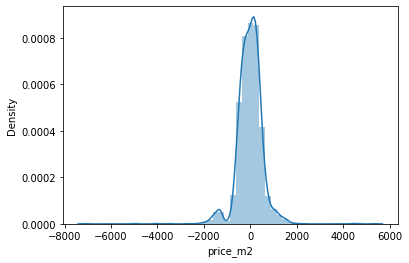

In [69]:
sns.distplot(ytest - ypred)

<AxesSubplot:ylabel='price_m2'>

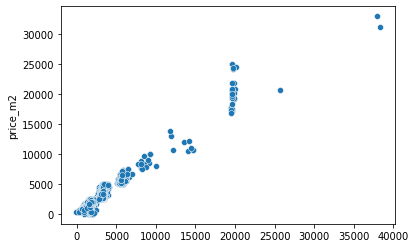

In [78]:
sns.scatterplot(y=ytest, x=ypred)

### Regressão Linear Ridge

In [110]:
# Modelo de Regressão Linear Ridge = model22

alpha = 1.5
model22 = Ridge(alpha=alpha)

model22.fit(Xtrain, ytrain)

ypred_ridge = model22.predict(Xtest)

#print(model22.coef_, model22.intercept_)

print ('MAE:', mean_absolute_error(ytest, ypred_ridge).round(2))
print ('MSE:', mean_squared_error(ytest, ypred_ridge).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred_ridge)).round(2))
print("R2: %f" % r2_score(ytest, ypred_ridge))


MAE: 368.82
MSE: 286089.83
RMSE: 534.87
R2: 0.926653


### Regressão Linear Lasso

In [111]:
# Modelo de Regressão Linear Lasso = model23

#from sklearn import linear_model

alpha = 0.01
model23 = Lasso(alpha=alpha)

model23.fit(Xtrain, ytrain)

ypred_lasso = model23.predict(Xtest)

#print('Coeficientes: ', model23.coef_)

print ('MAE:', mean_absolute_error(ytest, ypred_lasso).round(2))
print ('MSE:', mean_squared_error(ytest, ypred_lasso).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred_lasso)).round(2))
print("R2: %f" % r2_score(ytest, ypred_lasso))


MAE: 377.72
MSE: 302545.83
RMSE: 550.04
R2: 0.922434


In [112]:
# Modelo de Regressão Linear ElasticNet = model24

#from sklearn import linear_model

alpha = 0.0001
model24 = ElasticNet(alpha=alpha) #, l1_ratio=0.7)

model24.fit(Xtrain, ytrain)

ypred_enet = model24.predict(Xtest)

#print('Coeficientes: ', model23.coef_)

print ('MAE:', mean_absolute_error(ytest, ypred_enet).round(2))
print ('MSE:', mean_squared_error(ytest, ypred_enet).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred_enet)).round(2))
print("R2: %f" % r2_score(ytest, ypred_enet))

MAE: 373.2
MSE: 290412.34
RMSE: 538.9
R2: 0.925544


<AxesSubplot:xlabel='price_m2', ylabel='Density'>

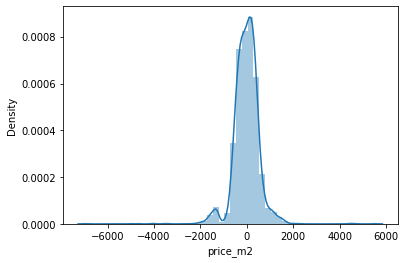

In [70]:
sns.distplot(ytest - ypred_lasso)

In [76]:
"""
m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
    use_line_collection=True,
)
"""
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(
    np.where(model23.coef_)[0],
    model23.coef_[model23.coef_ != 0],
    markerfmt="x",
    label="Lasso coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#ff7f0e")
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
    use_line_collection=True,
)

plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso, r2_score_enet)
)
plt.show()

NameError: name 'm' is not defined

In [57]:
#sns.scatterplot(data = ypred)
#sns.lineplot(data = df_properati_std['price_m2'])